In [18]:
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [4]:
 df_can = df[df.country == "Canada"]
df_can

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.750,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.960,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.300,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.130,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.880,22284500,18970.57086,CAN,124
245,Canada,Americas,1977,74.210,23796400,22090.88306,CAN,124
246,Canada,Americas,1982,75.760,25201900,22898.79214,CAN,124
247,Canada,Americas,1987,76.860,26549700,26626.51503,CAN,124
248,Canada,Americas,1992,77.950,28523502,26342.88426,CAN,124
249,Canada,Americas,1997,78.610,30305843,28954.92589,CAN,124


In [5]:
df_can["pop_diff"] = 0
df_can.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num', 'pop_diff'],
      dtype='object')

In [6]:
pop_diff = df_can["pop"].diff()
df_can['pop_diff'] = pop_diff
df_can

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,pop_diff
240,Canada,Americas,1952,68.750,14785584,11367.16112,CAN,124,NaN
241,Canada,Americas,1957,69.960,17010154,12489.95006,CAN,124,2224570.0
242,Canada,Americas,1962,71.300,18985849,13462.48555,CAN,124,1975695.0
243,Canada,Americas,1967,72.130,20819767,16076.58803,CAN,124,1833918.0
244,Canada,Americas,1972,72.880,22284500,18970.57086,CAN,124,1464733.0
245,Canada,Americas,1977,74.210,23796400,22090.88306,CAN,124,1511900.0
246,Canada,Americas,1982,75.760,25201900,22898.79214,CAN,124,1405500.0
247,Canada,Americas,1987,76.860,26549700,26626.51503,CAN,124,1347800.0
248,Canada,Americas,1992,77.950,28523502,26342.88426,CAN,124,1973802.0
249,Canada,Americas,1997,78.610,30305843,28954.92589,CAN,124,1782341.0


In [30]:
df_can2 = df_can[["year", "pop", "pop_diff"]]
df_can2.rename(columns = {"pop": "popu"}, inplace = True)
df_can_popu_list = df_can2.popu.tolist()
df_can_year_list = df_can2.year.tolist()
df_can_pop_diff_list = df_can2.pop_diff.tolist()
df_can_pop_diff_list[0] = 0
df_can_pop_diff_list, df_can_year_list, df_can_popu_list

([0,
  2224570.0,
  1975695.0,
  1833918.0,
  1464733.0,
  1511900.0,
  1405500.0,
  1347800.0,
  1973802.0,
  1782341.0,
  1596425.0,
  1487873.0],
 [1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007],
 [14785584,
  17010154,
  18985849,
  20819767,
  22284500,
  23796400,
  25201900,
  26549700,
  28523502,
  30305843,
  31902268,
  33390141])

In [19]:
max_value = max(df_can_pop_diff_list)
max_index = df_can_pop_diff_list. index(max_value)
print("the year that canada had the largest increase in population was from ", df_can_year_list[max_index - 1], " to ", df_can_year_list[max_index])

the year that canada had the largest increase in population was from  1952  to  1957


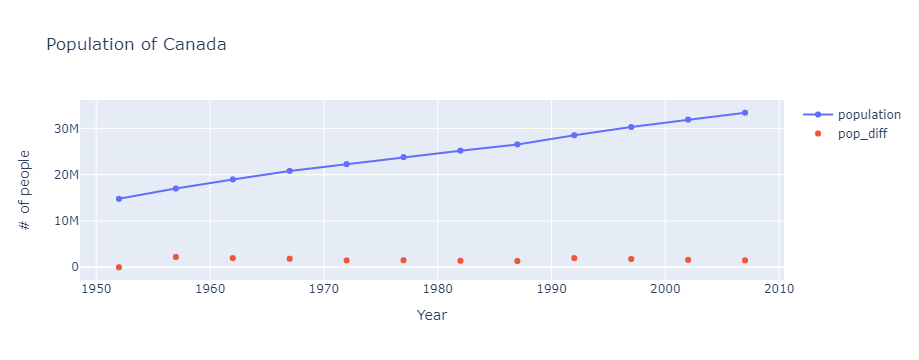

In [49]:
fig1 = go.Figure()
fig1.add_trace(
    go.Scatter(x = df_can_year_list, y = df_can_popu_list,
               mode = 'lines+markers',
               name = "population")
)
fig1.add_trace(
    go.Scatter(x = df_can_year_list, y = df_can_pop_diff_list, 
               mode = 'markers',
               name = "pop_diff")
)
fig1.update_layout(
    title = "Population of Canada",
    xaxis_title = 'Year',
    yaxis_title = '# of people')
fig1

In [51]:
fig.show("json")